<img src="https://media-exp1.licdn.com/dms/image/C4E1BAQEKOIsF4fUeLg/company-background_10000/0?e=2159024400&v=beta&t=URpnngW1v84s3H7co4-iXZ2OsbUZUcdY8pVemsQZ-3g"/>

# Data Set Information
**This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.**

# Attribute Information:

- Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

# Task
**We Can Build a Model for Prediction of Parkinson's Disease using Machine Learning Techniques.**

## Steps:
- Import Libraries
- Get the Data
- Data Preprocessing
- Train-Test Split
- Scalling the Data
- Creating and Training the Model
- Predictions
- Residual Analysis
- Evaluating the model

**Let's get started!**

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

# Get the data

In [3]:
dataset=pd.read_csv("parkinsons.data")

In [4]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
dataset.shape

(195, 24)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Data Preprocessing

In [8]:
# checking for null values...
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**There is no null values in our data..**

Name column doesn't make any sense, so we can remove it.

In [9]:
dataset=dataset.drop("name",axis=1)

In [10]:
dataset["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

**It is an Unbalanced Dataset**

# EDA

In [11]:
# Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables...
#sns.pairplot(dataset,hue='status',palette='coolwarm')

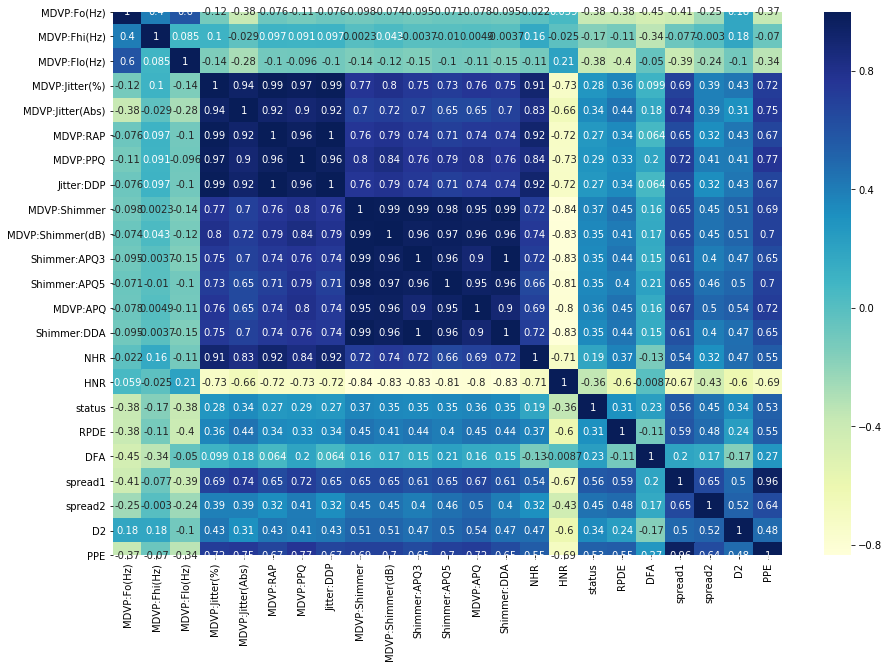

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")

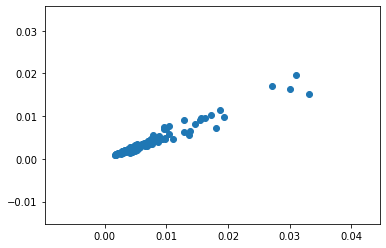

In [13]:
plt.scatter(data=dataset,x='MDVP:Jitter(%)',y="MDVP:PPQ")

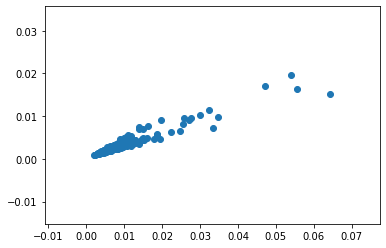

In [14]:
plt.scatter(data=dataset,x='Jitter:DDP',y="MDVP:PPQ")

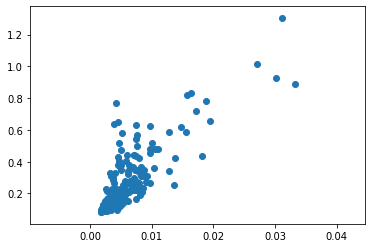

In [15]:
plt.scatter(data=dataset,x='MDVP:Jitter(%)',y='MDVP:Shimmer(dB)')

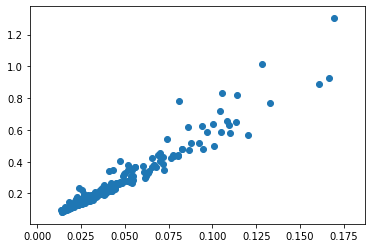

In [16]:
plt.scatter(data=dataset,x='Shimmer:DDA',y='MDVP:Shimmer(dB)')

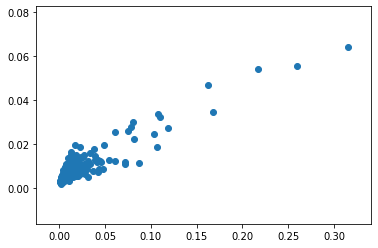

In [17]:
plt.scatter(data=dataset,x='NHR',y='Jitter:DDP')

In [18]:
correlation_values=dataset.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

# Problem:
**Here we are facing Multicollinearity**
- Multicollinearity generally occurs when there are high correlations between two or more feature variables. In other words, one predictor variable can be used to predict the other. So We need to remove some feature varaibles...
- I am eleminating some feature variables by using RFE(Calculated seperately)

In [36]:
X=dataset.drop('status',axis=1)
y=dataset["status"]

# Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(136, 22)
(136,)
(59, 22)
(59,)


# Scalling the Data

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creating and Training the Model

In [41]:
import statsmodels.api as sm

In [42]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                  136
Model:                            GLM   Df Residuals:                      113
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 04 Sep 2020   Deviance:                          nan
Time:                        08:37:29   Pearson chi2:                     68.5
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1538      2.024      3.040      0.002       2.187      10.121
x1            -2.5802      1.561     -1.653      0.098      -5.640       0.480
x2            -0.5567      0.785     -0.710      0.478      -2.095       0.981
x3             0.7257      0.771      0.941      0.347      -0.786       2.237
x4           -12.1230     10.887     -1.113      0.265     -33.462       9.216
x5            -8.7251      5.715     -1.527      0.127     -19.927       2.477
x6           122.1657    681.728      0.179      0.858   -1213.996    1458.328
x7             1.3806     10.275      0.134      0.893     -18.759      21.520
x8          -106.0398    681.988     -0.155      0.876   -1442.711    1230.632
x9            28.6982     31.622      0.908      0.364     -33.279      90.675
x10            4.7310      9.413      0.503      0.615     -13.719      23.181
x11         -204.8508   1689.582     -0.121      0.903   -3516.371    3106.669
x12          -11.8607     10.504     -1.129      0.259     -32.449       8.727
x13           -4.7673     11.198     -0.426      0.670     -26.714      17.180
x14          190.3760   1690.303      0.113      0.910   -3122.556    3503.308
x15            4.6620      3.816      1.222      0.222      -2.817      12.141
x16            0.9316      1.621      0.575      0.566      -2.246       4.109
x17            0.4398      0.905      0.486      0.627      -1.333       2.213
x18            0.4938      0.692      0.714      0.475      -0.862       1.850
x19           -0.9512      3.575     -0.266      0.790      -7.958       6.056
x20            0.3671      0.854      0.430      0.667      -1.306       2.040
x21            1.8718      0.932      2.007      0.045       0.044       3.699
x22            4.5133      4.298      1.050      0.294      -3.910      12.936
==============================================================================
"""

There are lot of Features contains high P value, so we need to remove some of them...

# RFE

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('MDVP:Fo(Hz)', True, 1),
 ('MDVP:Fhi(Hz)', True, 1),
 ('MDVP:Flo(Hz)', False, 8),
 ('MDVP:Jitter(%)', True, 1),
 ('MDVP:Jitter(Abs)', True, 1),
 ('MDVP:RAP', True, 1),
 ('MDVP:PPQ', True, 1),
 ('Jitter:DDP', True, 1),
 ('MDVP:Shimmer', True, 1),
 ('MDVP:Shimmer(dB)', True, 1),
 ('Shimmer:APQ3', False, 5),
 ('Shimmer:APQ5', False, 6),
 ('MDVP:APQ', False, 2),
 ('Shimmer:DDA', False, 9),
 ('NHR', False, 3),
 ('HNR', False, 10),
 ('RPDE', False, 4),
 ('DFA', True, 1),
 ('spread1', True, 1),
 ('spread2', False, 7),
 ('D2', True, 1),
 ('PPE', True, 1)]

In [47]:
col = X.columns[rfe.support_]
col

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
       'MDVP:Shimmer(dB)', 'DFA', 'spread1', 'D2', 'PPE'],
      dtype='object')

In [112]:
required=X[col].drop(["Jitter:DDP","MDVP:Jitter(Abs)","MDVP:Fhi(Hz)","spread1","MDVP:Shimmer","MDVP:Shimmer(dB)","MDVP:Jitter(%)","MDVP:Fo(Hz)"],axis=1)

In [113]:
X_train_sm = sm.add_constant(required)
logm2 = sm.GLM(y,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                  195
Model:                            GLM   Df Residuals:                      189
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56.809
Date:                Fri, 04 Sep 2020   Deviance:                       113.62
Time:                        09:16:36   Pearson chi2:                     166.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.8287      4.986     -3.576      0.000     -27.601      -8.056
MDVP:RAP    1690.4147    655.051      2.581      0.010     406.539    2974.291
MDVP:PPQ   -2339.7837    746.164     -3.136      0.002   -3802.237    -877.330
DFA           11.7787      5.538      2.127      0.033       0.924      22.633
D2             2.5215      1.009      2.500      0.012       0.544       4.499
PPE           40.6471      7.649      5.314      0.000      25.655      55.639
==============================================================================
"""

**After lot of addings and removings we get stable p values with these features**

# Vif

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] =required.columns
vif['VIF'] = [variance_inflation_factor(required.values, i) for i in range(required.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,MDVP:PPQ,51.19
3,D2,39.76
0,MDVP:RAP,34.57
2,DFA,32.14
4,PPE,20.12


vif is too high....

# Predictions

In [115]:
predictions= res.predict(X_train_sm)

# Residual Analysis

Text(0.5, 0, 'Errors')

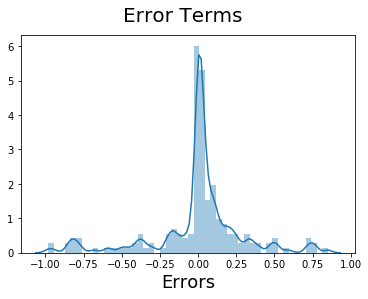

In [116]:
fig = plt.figure()
sns.distplot(( y- predictions),)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)

**Errors are normally distributed**

# Evaluating the model

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [117]:
print("classification report:")
print(classification_report(y,predictions.round()))
print("\n")
print("accuracy score:")
print(accuracy_score(y,predictions.round()))
print("\n")
print("confusion matrix:")
print(confusion_matrix(y,predictions.round()))

classification report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        48
           1       0.91      0.93      0.92       147

    accuracy                           0.88       195
   macro avg       0.84      0.82      0.83       195
weighted avg       0.87      0.88      0.88       195



accuracy score:
0.8769230769230769


confusion matrix:
[[ 34  14]
 [ 10 137]]


**we can get good accuracy with Xgboost than Logistic regression.**